# Week 5 - Classification

## Binary Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### The Dependent Variable

* y is binary or multilabel as in multinomial regression
* Linear regression y is continuous and we predict y
* Logistic regression y is categorical and we classify y

https://ai.plainenglish.io/why-is-logistic-regression-called-regression-if-it-is-a-classification-algorithm-9c2a166e7b74

### Linear Regression

$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

### Logistic Regression

$y = Sigmoid(\beta_0 + \beta_1X_1 + ... + \beta_nX_n)$

### Sigmoid

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.

https://en.wikipedia.org/wiki/Sigmoid_function

### Logistic Function

Logistic functions are used in logistic regression to model how the probability $p$ of an event may be affected by one or more explanatory variables: an example would be to have the model $p = f(a + bx)$, where $x$ is the explanatory variable, $a$ and $b$ are model parameters to be fitted, and $f$ is the standard logistic function.

https://en.wikipedia.org/wiki/Logistic_function#In_statistics_and_machine_learning

Common example of a sigmoid function as a logistic function:

$
S(x) = \large{\frac{1}{1 + e^{-x}}}
$

where we substitute $x$ for $\beta_0 + \beta_1X_1$ and e is the base of the natural logarithm, or Euler's number.

We will use the following formula for the example below:

* $f(x) = \large{\frac{1}{1 + e^{-(x / s)}}}$
* where $s$ is a scale parameter

or 

* $f(x) = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}}$
* where $\beta_0 = \mu / s$
* and $\beta_1 = 1 / s$

$\beta _{0}$ or, $\mu / s$, is known as the intercept (it is the vertical intercept or y-intercept of the line $y=\beta _{0}+\beta _{1}x$), and $\beta _{1}=1/s$ (inverse scale parameter or rate parameter): these are the y-intercept and slope of the log-odds as a function of x. Conversely, $\mu =-\beta _{0}/\beta _{1}$ and $s=1/\beta _{1}$.

### Scale Parameter

In probability theory and statistics, a scale parameter is a special kind of numerical parameter of a parametric family of probability distributions. The larger the scale parameter, the more spread out the distribution.

https://en.wikipedia.org/wiki/Scale_parameter

0.2689414213699951
0.5
0.7310585786300049


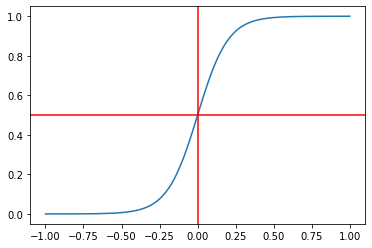

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-1, 1, 100)
s = .1
print((1 / (1 + np.exp(-(-1)))))
print((1 / (1 + np.exp(-(0)))))
print((1 / (1 + np.exp(-(1)))))
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))))
plt.axhline(.5, color='red')
plt.axvline(0, color='red')
plt.show();

There's a couple of assumptions we need to make. Probability of something happening has to be in the range of 0 and 1. We use the exponential so that the probability is always positive and we use 1 as the numerator to keep it less than or equal to 1.

In binary classification we can classify something as a one or a zero. We can then define a threshold of 0.5 and state that everything that is less than 0.5 can be classified as a 0 and all others classified as a 1.

A logistic function can also be considered in the form of a logistic curve, or the S-shaped curve (sigmoid curve) ... Logistic functions are used in several roles in statistics. For example, they are the cumulative distribution function of the logistic family of distributions... Logistic functions are used in logistic regression to model how the probability $p$ of an event may be affected by one or more explanatory variables.

https://en.wikipedia.org/wiki/Logistic_function

One more time:

* Logistic regression algorithm - $f(x) = \large{\frac{1}{1 + e^{-x}}}$
* x = $\beta_0 + \beta_1X_1$
* Note that x is multiplied by -1
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$

### Negative Exponents

* A negative exponent means how many times to divide by the number
* Example: $5^{-2}$ = 1 ÷ 5 ÷ 5 = 0.04
* Calculate the positive exponent ($5^2$)
* Then take the Reciprocal (i.e. 1/$5^2$)

https://www.mathsisfun.com/algebra/negative-exponents.html

## Make Classification

In [2]:
# Create dataset
import pandas as pd
from sklearn.datasets import make_classification

n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features

# unpack X and y
features, binary_class = make_classification(n_samples=n, n_features=f,  
                                             n_informative=inform, n_redundant=0, 
                                             n_clusters_per_class=1, random_state=27)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Class'] = binary_class
df.head()

,Feature_1,Feature_2,Class
0,-0.164907,0.591416,1
1,-1.563239,0.639282,1
2,-1.176249,-0.012935,1
3,1.481190,-1.677339,0
4,-0.187633,0.681020,0


Our goal is to build a model that can predict, or classify, whether new data belongs to class 0 or class 1. We split the data into training sets and test sets. We train, or fit, our model using the training data. This is how our model learns about the relationships between the features and the target (or label, class, outcome, dependent variable, etc.). The test data represents data our model has never seen before and when we feed our trained model with the test set, we get back metrics that tell us how well our model was able to predict or classify.

## Comparing Statsmodel Logit with Scikit-learn Logistic Regression

* from statsmodels.formula.api import logit
* from sklearn.linear_model import LogisticRegression

## Statsmodel Logit

### Pseudo R-Squared

A non-pseudo R-squared is a statistic generated in ordinary least squares (OLS) regression that is often used as a goodness-of-fit measure... When analyzing data with a logistic regression, an equivalent statistic to R-squared does not exist.  The model estimates from a logistic regression are maximum likelihood estimates arrived at through an iterative process.  They are not calculated to minimize variance, so the OLS approach to goodness-of-fit does not apply.  However, to evaluate the goodness-of-fit of logistic models, several pseudo R-squareds have been developed.   These are “pseudo” R-squareds because they look like R-squared in the sense that they are on a similar scale, ranging from 0 to 1 (though some pseudo R-squareds never achieve 0 or 1) with higher values indicating better model fit, but they cannot be interpreted as one would interpret an OLS R-squared and different pseudo R-squareds can arrive at very different values.

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/

### Maximum Likelihood Estimation

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

### Log-Likelihood

A good way to express numbers, slopes, and linear relationships.

A likelihood method is a measure of how well a particular model fits the data; They explain how well a parameter (θ) explains the observed data. The logarithms of likelihood, the log likelihood function, does the same job and is usually preferred for a few reasons:
* The log likelihood function in maximum likelihood estimations is usually computationally simpler
* Likelihoods are often tiny numbers (or large products) which makes them difficult to graph. Taking the natural (base e) logarithm results in a better graph with large sums instead of products
* The log likelihood function is usually (not always!) easier to optimize

Stephanie Glen. "Log Likelihood Function" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/log-likelihood-function/

### Odds and Odds Ratio

Another logistic formula = odds = $ln\frac{p}{1 - p} = \beta_0 + \beta_1X_1$

In logistic regression the odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.

https://www.theanalysisfactor.com/why-use-odds-ratios/

Odds are the probability of an event occurring divided by the probability of the event not occurring. An odds ratio is the odds of the event in one group, for example, those exposed to a drug, divided by the odds in another group not exposed.

https://pubmed.ncbi.nlm.nih.gov/18238982/

An odds ratio (OR) is a statistic that quantifies the strength of the association between two events, A and B. The odds ratio is defined as the ratio of the odds of A in the presence of B and the odds of A in the absence of B, or equivalently (due to symmetry), the ratio of the odds of B in the presence of A and the odds of B in the absence of A. Two events are independent if and only if the OR equals 1, i.e., the odds of one event are the same in either the presence or absence of the other event. If the OR is greater than 1, then A and B are associated (correlated) in the sense that, compared to the absence of B, the presence of B raises the odds of A, and symmetrically the presence of A raises the odds of B. Conversely, if the OR is less than 1, then A and B are negatively correlated, and the presence of one event reduces the odds of the other event.

https://en.wikipedia.org/wiki/Odds_ratio

Everything starts with the concept of probability.  Let’s say that the probability of success of some event is .8.  Then the probability of failure is 1 – .8 = .2.  The odds of success are defined as the ratio of the probability of success over the probability of failure.  In our example, the odds of success are .8/.2 = 4. 

This example is adapted from Pedhazur (1997). Suppose that seven out of 10 males are admitted to an engineering school while three of 10 females are admitted. The probabilities for admitting a male are,

p = 7/10 = .7 q = 1 – .7 = .3

If you are male, the probability of being admitted is 0.7 and the probability of not being admitted is 0.3.

Here are the same probabilities for females,

p = 3/10 = .3 q = 1 – .3 = .7

If you are female it is just the opposite, the probability of being admitted is 0.3 and the probability of not being admitted is 0.7.

Now we can use the probabilities to compute the odds of admission for both males and females,

odds(male) = .7/.3 = 2.33333 odds(female) = .3/.7 = .42857

Next, we compute the odds ratio for admission,

OR = 2.3333/.42857 = 5.44

Thus, for a male, the odds of being admitted are 5.44 times as large as the odds for a female being admitted.

<pre>
        p       odds  
      .001    .001001
       .01    .010101
        .2        .25
        .3   .4285714
        .4   .6666667
        .5          1
        .6        1.5
        .7   2.333333
        .8          4
        .9          9
      .999        999
     .9999       9999
</pre>

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### Marginal Effects

Marginal effects tells us how a dependent variable (outcome) changes when a specific independent variable (explanatory variable) changes. Other covariates are assumed to be held constant. Marginal effects are often calculated when analyzing regression analysis results.

Stephanie Glen. "Marginal Effects: Definition" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/marginal-effects/

In [3]:
# https://onezero.blog/modelling-binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation/
from statsmodels.formula.api import logit

model = logit(formula='Class ~ Feature_1 + Feature_2', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.190325
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.7254
Time:                        14:24:44   Log-Likelihood:                -190.33
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                4.247e-219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5188      0.146     -3.547      0.000      -0.805      -0.232
Feature_1     -3.6476      0.313    -11.636      0.000      -4.262      -3.033
Feature_2      0.6341      0.182      3.480      0.001       0.277       0.991
==============================================================================
"""

In [4]:
# odds ratio
import numpy as np

np.exp(model.params)

Intercept    0.595246
Feature_1    0.026053
Feature_2    1.885241
dtype: float64

One unit increase in Feature_1 increases the odds of being Class 1 by .026

In [5]:
# marginal effects
model.get_margeff(at='overall', method='dydx').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  Class
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1     -0.2085      0.011    -19.612      0.000      -0.229      -0.188
Feature_2      0.0362      0.010      3.601      0.000       0.017       0.056
==============================================================================
"""

Feature_1 and Feature_2 are significant and a unit increase in Feature_2 increases the probability of Class 1 by 3.62%

<AxesSubplot:xlabel='Feature_2', ylabel='Class'>

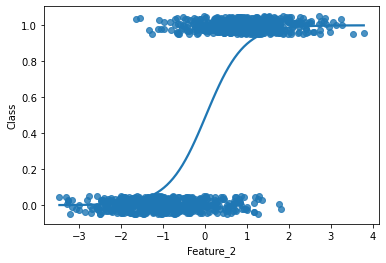

In [6]:
# plot
import seaborn as sns

sns.regplot(x='Feature_2', y='Class',
           y_jitter=0.05,
           data = df,
           logistic=True,
           ci=None)

## Scikit-learn Logistic Regression

### Hyperparamters

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

Hyperparameters for the logistic regression algorithm include:

* Penalty
* Solver
* C

### Hyperparameters vs Parameters

Parameters are calculated from our data. Recall our parameters for a simple linear regression algorithm which we will define as $y = \beta_0 + \beta_1X$. $\beta_0$ and $\beta_1$ are our parameters and we've already discussed how we can solve for those parameters. Our goal is to minimize the error of these parameters after we have collected enough data, cleaned it, selected and engineered our features. After we have done all of this we then find our best coefficients / parameters by fine tuning our model's performance through its hyperparameters, if available. 

### Regularization

In mathematics, statistics, finance, computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

https://en.wikipedia.org/wiki/Regularization_(mathematics)

### Penalty (regularization)

* l1: this penalty trains coefficients to be zero (similar to feature selection). Search the web for Lasso Regression.
* l2: this penalty trains coefficients to be near zero. Search the web for Ridge Regression
* elasticnet: this is a combination of l1 and l2 penalties

Check out https://www.statisticshowto.com/regularization/

### C

Controls the penalty strength.

The following is for demonstration purposes. It makes use of make_classification which creates a data set given some parameters. Please see the following for more information:
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Solver

* Solvers are used to minimize the loss function which in turn provides our best coefficients. Please see the documentation to learn about the five different solvers
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Readings

* https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions and<br />
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:
# train test split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.20, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Create and evaluate model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(f'Model Train Score: {model.score(X_train, y_train)}')
print(f'Model Test Score: {accuracy_score(y_test, predictions)}')

Model Train Score: 0.92875
Model Test Score: 0.92


In [9]:
# example of lasso regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classes = [0, 1]

# We will cycle through some values for C and see what happens to our coefficients using an l1 penalty
# l1 penalty trains coefficients to be zero
# solver needs to be something that handles l1
c_list = [10, 1, 0.1, 0.01]
for c in c_list:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='auto', max_iter=500)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(f'C = {c}')
    print('Coefficients for each class:')
    for cl, c in zip(classes, model.coef_):
        print(cl, c)
    print(f'Training score: {model.score(X_train, y_train)}')
    print(f'Testing score: {accuracy_score(predictions, y_test)}')
    print()

C = 10
Coefficients for each class:
0 [-4.23034132  0.80378092]
Training score: 0.92875
Testing score: 0.92

C = 1
Coefficients for each class:
0 [-4.10831521  0.76569124]
Training score: 0.92875
Testing score: 0.92

C = 0.1
Coefficients for each class:
0 [-3.33661946  0.50157478]
Training score: 0.9225
Testing score: 0.92

C = 0.01
Coefficients for each class:
0 [-1.49795537  0.        ]
Training score: 0.9175
Testing score: 0.905



Notice as C decreases the coefficients get closer to 0.

In [10]:
# example of ridge regularization
c_list = [10, 1, 0.1, 0.01]
for c in c_list:
    model = LogisticRegression(penalty='l2', C=c, solver='liblinear', multi_class='auto', max_iter=500)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(f'C = {c}')
    print('Coefficients for each class:')
    for cl, c in zip(classes, model.coef_):
        print(cl, c)
    print(f'Training score: {model.score(X_train, y_train)}')
    print(f'Testing score: {accuracy_score(predictions, y_test)}')
    print()

C = 10
Coefficients for each class:
0 [-4.17689126  0.81815885]
Training score: 0.92875
Testing score: 0.92

C = 1
Coefficients for each class:
0 [-3.73385814  0.87806324]
Training score: 0.92875
Testing score: 0.92

C = 0.1
Coefficients for each class:
0 [-2.35246497  0.97908227]
Training score: 0.93
Testing score: 0.915

C = 0.01
Coefficients for each class:
0 [-0.98592267  0.68054658]
Training score: 0.9225
Testing score: 0.915



Notice as C decreases the coefficients get smaller but never reach 0.

### Bias Variance Tradeoff

In statistics and machine learning, the bias–variance tradeoff is the property of a model that the variance of the parameter estimates across samples and can be reduced by increasing the bias in the estimated parameters. The bias–variance dilemma or bias–variance problem is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

Please become familiar with this image:

https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg

Please read the article responsible for the image:

https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html

<table width='50%' style='margin-right: 100%'>
    <tr>
        <td>Training Error</td>
        <td>1%</td>
        <td>15%</td>
        <td>16%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td>Testing Error</td>
        <td>9%</td>
        <td>16%</td>
        <td>30%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td></td>
        <td>lo bias</td>
        <td>hi bias</td>
        <td>hi bias</td>
        <td>lo bias</td>
    </tr>
    <tr>
        <td></td>
        <td>hi var</td>
        <td>lo var</td>
        <td>hi var</td>
        <td>lo var</td>
    </tr>
</table>

https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/

* Bias is introduced in training
* Variance is the result of seeing new data, the inconsistency of predictions

### Underfitting and Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

If you're overfitting, or you are getting great training scores and poor  test scores, try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing. Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

If you're underfitting, or you are getting poor training scores and test scores, try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

### Decision Threshold

In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

https://developers.google.com/machine-learning/crash-course/classification/thresholding

### Test Statistics

**True Negative (TN)**: An outcome that is labeled 0 and in reality is a 0 

**False Positive (FP)**: An outcome that is labeled 1 and in reality is a 0 (type I error)

**False Negative (FN)**: An outcome that is labeled 0 and in reality is a 1 (type II error)

**True Positive (TP)**: An outcome that is labeled 1 and in reality is a 1 

**Accuracy**: (TP + TN) / (TP + FP + TN + FN)

**Precision**: TP / (TP + FP), a measure of quality

**Recall**: TP / (TP + FN), a measure of quantity

* True Negative (tn): An outcome that is labeled 0 and in reality is a 0, pred 0 actual 0 
* False Positive (fp): An outcome that is labeled 1 and in reality is a 0, pred 1 actual 0 
* False Negative (fn): An outcome that is labeled 0 and in reality is a 1, pred 0 actual 1 
* True Positive (tp): An outcome that is labeled 1 and in reality is a 1, pred 1 actual 1 
* Accuracy: (tp + tn) / (tp + fp + tn + fn)
* Precision: tp / (tp + fp), a measure of quality
* Recall: tp / (tp + fn), a measure of quantity

### Type I and Type II Errors 

https://towardsdatascience.com/statistics-for-data-scientists-f2456d26c5a5

* Type I Error means rejecting the TRUE NULL HYPOTHESIS and accepting the alternate hypothesis. It is a false positive. A smoke detector detecting smoke when there is no smoke.
* Type II Error means accepting the null hypothesis when an ALTERNATE HYPOTHESIS IS TRUE. It is a false negative. When fire alarm fails to detect fire.

### Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix)... It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). They provide our True Negatives, False Positives, False Negatives, and True Positives, from which we derive Accuracy, Precision, and Recall.

https://en.wikipedia.org/wiki/Confusion_matrix

**Note**: Because of the of the output sklearn provides, we will structure our table different from what Wikipedia says.

In [11]:
# View confusion matrix, classification report, and auc
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Here is what the numbers represent from the sklLearn output')
print('''
                    predicted
                   |  0  |  1
           --------------------  
           class 0 | TN  |  FP      
  actual   --------------------
           class 1 | FN  |  TP
''')
print()
print('Here is what the numbers represent from the Wikipedia article')
print('''
                      actual
                   |  1  |  0
           --------------------  
           class 1 | TP  |  FN      
predicted  --------------------
           class 0 | FP  |  TN
''')

Confusion Matrix
[[92 12]
 [ 5 91]]

Here is what the numbers represent from the sklLearn output

                    predicted
                   |  0  |  1
           --------------------  
           class 0 | TN  |  FP      
  actual   --------------------
           class 1 | FN  |  TP


Here is what the numbers represent from the Wikipedia article

                      actual
                   |  1  |  0
           --------------------  
           class 1 | TP  |  FN      
predicted  --------------------
           class 0 | FP  |  TN



Confused? Please be aware of the distinction. In this course we will be using the sklearn matrix. There is a way to change the rows and columns to match Wikipedia's matrix by adding labels: confusion_matrix(y_test, predictions, labels=\[1, 0\]).

https://en.wikipedia.org/wiki/Confusion_matrix

In [12]:
# Compare with crosstab
import pandas as pd

pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,92,12,104
1,5,91,96
All,97,103,200


* Domain: inputs
* Range: outputs

### Test Statistics

* tn = pred 0 actual 0 
* fp = pred 1 actual 0 
* fn = pred 0 actual 1 
* tp = pred 1 actual 1 

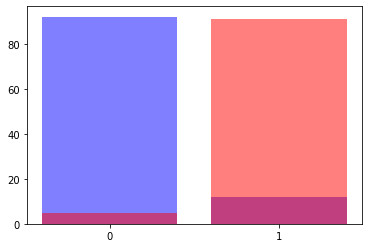

In [13]:
import matplotlib.pyplot as plt

probs=model.predict(X_test)

# plt.hist(probs[y_test==0], color='blue', alpha=0.5, bins=2, rwidth=.8)
counts = np.bincount(probs[y_test==0])
plt.bar(range(2), counts, width=.8, align='center', color='blue', alpha=0.5)
# plt.hist(probs[y_test==1], color='red', alpha=0.5, bins=2, rwidth=.8)
counts = np.bincount(probs[y_test==1])
plt.bar(range(2), counts, width=.8, align='center', color='red', alpha=0.5)

plt.xticks(range(2));

In [14]:
# confusion matrix reminder
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[92, 12],
       [ 5, 91]], dtype=int64)

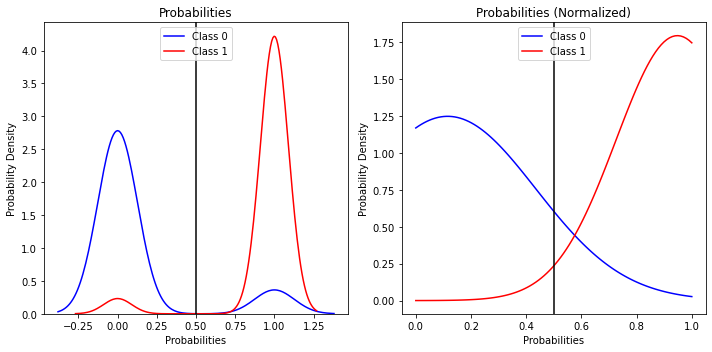

In [15]:
# Compare KDE plots for probabilities and normed probabilities
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# import warnings
# warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

probs=model.predict(X_test)
sns.kdeplot(probs[y_test==0], shade=False, color='blue', label='Class 0', ax=ax1);
sns.kdeplot(probs[y_test==1], shade=False, color='red', label='Class 1', ax=ax1);
ax1.axvline(x=.5, color='black')
ax1.set_title('Probabilities')
ax1.set(xlabel='Probabilities', ylabel='Probability Density')

mean = probs[y_test==0].mean() 
std = probs[y_test==0].std()
x = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y = stats.norm.pdf(x, mean, std)
ax2.plot(x, y, color='blue', label='Class 0')

mean = probs[y_test==1].mean() 
std = probs[y_test==1].std()
x = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y = stats.norm.pdf(x, mean, std)
ax2.plot(x, y, color='red', label='Class 1')

x_threshold = 0.5
ax2.axvline(x=x_threshold,color='black')

ax2.set_title('Probabilities (Normalized)')
ax2.set(xlabel='Probabilities', ylabel='Probability Density')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')
plt.tight_layout()
plt.show()

In this graph we divided the testing data between the 0 class, or label, and 1 class. We then plotted their distribution and used a threshold of 0.5 to separate data into their respective classes. We then normalized the data to smooth out the curve. We can see the majority of class 0 is to the left of the decision threshold compared the majority of class 1 being to the right of the decision threshold. However, we do see some values that cross the threshold. These have been misclassified.

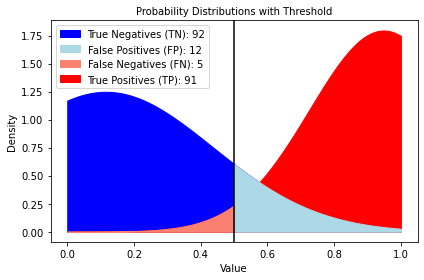

In [16]:
# visualize TN, FN, FP, TP
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
import scipy.stats as stats

x_threshold = 0.5
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

mean_0 = probs[y_test==0].mean() 
std_0 = probs[y_test==0].std()
x_0 = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y_0 = stats.norm.pdf(x_0, mean_0, std_0)

mean_1 = probs[y_test==1].mean() 
std_1 = probs[y_test==1].std()
x_1 = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y_1 = stats.norm.pdf(x_1, mean_1, std_1)

plt.plot(x_0, y_0, alpha=0)
plt.fill_between(x_0, y_0, color='blue', alpha=1)

plt.plot(x_1, y_1, alpha=0)
plt.fill_between(x_1, y_1, color='red', alpha=1)

ptx_0 = np.linspace(x_threshold, probs[y_test==0].max(), 100)
pty_0 = stats.norm.pdf(ptx_0, mean_0, std_0)
plt.fill_between(ptx_0, pty_0, color='lightblue', alpha=1)

ptx_1 = np.linspace(probs[y_test==1].min(), x_threshold, 100)
pty_1 = stats.norm.pdf(ptx_1, mean_1, std_1)
plt.fill_between(ptx_1, pty_1, color='salmon', alpha=1)

tn_patch = mpatches.Patch(color='blue', label='True Negatives (TN): ' + str(tn))
fp_patch = mpatches.Patch(color='lightblue', label='False Positives (FP): ' + str(fp))
fn_patch = mpatches.Patch(color='salmon', label='False Negatives (FN): ' + str(fn))
tp_patch = mpatches.Patch(color='red', label='True Positives (TP): ' + str(tp))
plt.legend(handles=[tn_patch, fp_patch, fn_patch, tp_patch], loc=2)

plt.title('Probability Distributions with Threshold',fontsize=10)
plt.axvline(x=x_threshold, color='black')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()

In [17]:
# confusion matrix reminder
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[92, 12],
       [ 5, 91]], dtype=int64)

### Test Statistics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1

### The Classification Report for Imbalanced Data Sets

Consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99.9% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This gets back to our Precision Recall Tradeoff. 

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea

In [18]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[92 12]
 [ 5 91]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       104
           1       0.88      0.95      0.91        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



* precision 0: 114 / 137
* precision 1: 66 / 86
* recall 0: 114 / 134
* recall 1: 66 / 89

We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)). 

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

### Precision Recall Tradeoff

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance... Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score.

https://en.wikipedia.org/wiki/Precision_and_recall

In cases of imbalanced data, precision, recall, and f1 score become better metrics. Precision tells us the proportion of data that was predicted was actually predicted correctly. Recall, also known as the True Positive Rate, is the probability that an actual positive will be predicted to be positive.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

https://en.wikipedia.org/wiki/Precision_and_recall 

### ROC AUC Threshold

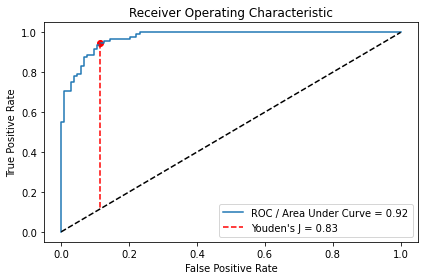

In [19]:
# plot ROC, and Youden's J
from sklearn.metrics import roc_auc_score, roc_curve
import math

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist


optimum_fpr = fp/(tn+fp)
optimum_tpr = tp/(fn+tp)

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC / Area Under Curve = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.scatter(optimum_fpr, optimum_tpr, c='red')
plt.plot([optimum_fpr, optimum_fpr], [optimum_tpr, optimum_fpr], 'r--', label='Youden\'s J = %0.2f' 
         % calculateDistance(optimum_fpr, optimum_fpr, optimum_tpr, optimum_fpr))
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()

### The ROC curve

Created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. 

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

False Positive Rate = FP / (FP + TN)

When using normalized units, the **area under the curve (often referred to as simply the AUC)** is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative').

https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

### Youden's J

A way of summarising the performance of a diagnostic test. Its value ranges from 0 through 1 (inclusive), and has a zero value when a diagnostic test gives the same proportion of positive results for groups with and without the disease, i.e the test is useless. A value of 1 indicates that there are no false positives or false negatives, i.e. the test is perfect. Provides an optimal threshold value. J = sensitivity+specificity−1 

https://www.scalestatistics.com/youden-index.html

## Metrics Review

In [20]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print()
print(f'''
                    predicted
                   |  0   |  1     
           -----------------------  ----------------------------------------------
           0       |  {tn}  |  {fp}      tnr                 |  fpr (type I error) 
  actual   -----------------------  ----------------------------------------------
           1       |  {fn}   |  {tp}     fnr (type II error) |  tpr (recall)

                     npv  | fdr
           ----------------------------
                     for  | precision (ppv)

''')

Confusion Matrix


                    predicted
                   |  0   |  1     
           -----------------------  ----------------------------------------------
           0       |  92  |  12      tnr                 |  fpr (type I error) 
  actual   -----------------------  ----------------------------------------------
           1       |  5   |  91     fnr (type II error) |  tpr (recall)

                     npv  | fdr
           ----------------------------
                     for  | precision (ppv)




### Metrics

https://towardsdatascience.com/avoiding-confusion-with-confusion-matrix-metrics-a8a3d0ead144

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
    
